In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, fnmatch
import datetime
import matplotlib
import matplotlib.dates as mdates

In [3]:
def find_file(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

In [4]:
names_Cs = find_file("C_multi*", "multi_runs")
names_runs = find_file("multi*", "multi_runs")

In [5]:
runs = [np.load(entry, allow_pickle = True) for entry in names_runs]
Cs = [np.load(entry) for entry in names_Cs]

In [50]:
Qs = [float(xx[19:22]) for xx in names_runs]
csizes = [xx[29:31] for xx in names_runs]

for xx in range(len(csizes)):
    
    if not is_number(csizes[xx][-1]):
        csizes[xx] = csizes[xx][0]
        
    csizes[xx] = int(csizes[xx])

In [7]:
mtrue = []
mfalse = []
for xx in range(len(names_runs)):
    if "msize500" in names_runs[xx]:
        mtrue.append(xx)
    else:
        mfalse.append(xx)
mtrue = np.array(mtrue)
mfalse = np.array(mfalse)

In [55]:
sday = []
snone = []
sweek = []
couplinghi = []
couplingmed = []
couplinglow = []

for xx in range(len(names_runs)):
    if "day_stagger" in names_runs[xx]:
        sday.append(xx)
    elif "week_stagger" in names_runs[xx]:
        sweek.append(xx)
    elif "none" in names_runs[xx]:
        snone.append(xx)
    else:
        print("new options?, " + names_runs[xx])
        
    if "coupling=1.0" in names_runs[xx]:
        couplinghi.append(xx)
    elif "coupling=0.1" in names_runs[xx]:
        couplingmed.append(xx)
    elif "coupling=0.01" in names_runs[xx]:
        couplinglow.append(xx)
        

sday = np.array(sday)
snone = np.array(snone)
sweek = np.array(sweek)
coupling_all = np.array([couplinghi, couplingmed, couplinglow], dtype =object)

new options?, multi_runs/multi_Q=0.5_csize=15_per=3_msize500_sch=validation_coupling=1.0.npy
new options?, multi_runs/multi_Q=0.1_csize=10_per=1_msizeFalse_sch=False.npy


In [9]:
runs_t_big = [[entry.t for entry in go] for go in runs]
runs_y_big = [[entry.y for entry in go] for go in runs]

runs_t = [np.concatenate(entry) for entry in runs_t_big]
runs_y = [np.concatenate(entry, axis = -1) for entry in runs_y_big]

runs_y = [np.reshape(runs_y[xx], (6,3,np.size(runs_t[xx]))) 
          for xx in range(len(runs_t))]

print(runs_y[0].shape)

(6, 3, 1214)


In [10]:
# from pre2016
parula = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]


def rightdate(t):
    tt = datetime.date(2020,7,23) + datetime.timedelta(t)
    return mdates.date2num(tt)

In [61]:
# first compare coupling only
Qs_off = [entry == 0 for entry in Qs]
cs15 = [entry == 15 for entry in csizes]
flatcoup = [entry for arr in coupling_all for entry in arr ]
# want mfalse and snone
# also need coupling


get_list = []

for xx in range(len(Qs)):
    if Qs_off[xx] == True and cs15[xx] == True and xx in mtrue and xx in snone and xx in flatcoup:
        get_list.append(xx)
        
get_list = np.array(get_list)
print(get_list)

[ 7 10 25]


In [ ]:
# runs_t

In [62]:
date_list = [[datetime.date(2020,7,23) + datetime.timedelta(days=np.floor(x)) + datetime.timedelta(minutes= x - np.floor(x))
             for x in xx] for xx in runst]

plot_dates = [matplotlib.dates.date2num(entry) for entry in date_list]

ticks = [datetime.date(2020,3,9), datetime.date(2020,7,23), datetime.date(2020,11,4)]

NameError: name 'runst' is not defined

In [59]:
def plotting_f(savename, toplot_t, toplot_y,
               dat_labels, ylim = (0,5*(10**4)), ):
    plt.clf()
    sns.set_context("talk")
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
    for xx in range(len(toplot)):
        ax1.plot(toplot_t[xx], toplot_y[xx][3,0],
             label = dat_labels[xx], color = parula[xx*25], ms = 4 )
        ax2.plot(toplot_t[xx], np.add(toplot_y[xx][3,0],toplot_y[xx][3,1]), 
             label = dat_labels[xx], color = parula[xx*25], ms = 4 )
        
    if 
        ax1.axhline(y=uni_size, c = "black")
        ax2.axhline(y=city_size, label = "total size", c = "black")

    ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    ax1.set_ylabel("Infected (persons)")
    ax1.set_title("University")
    ax1.set_xticks(ticks[1:])
    ax2.set_xticks(ticks[1:])
    ax2.set_title("City")

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.set_ylim(ylim)

    plt.legend()

    # add common x title
    f.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
    plt.xlabel("Day")
    ax2.legend(fontsize = 'x-small')

    plt.savefig(savename)
    plt.show()

array([list([6, 13, 15, 19, 22, 24, 25, 35, 40, 46, 47]),
       list([3, 7, 8, 28, 31, 33, 54, 57, 58]),
       list([10, 32, 34, 36, 39, 42, 49, 53])], dtype=object)

toload = ["multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=1.0.npy",
"multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=0.5.npy",
"multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=0.1.npy", 
         "multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=0.3.npy",
         "multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=0.01.npy"]
loaded = [np.load("multi_runs/" + str(entry), allow_pickle = True) for entry in toload]

datats = [[entry.t for entry in dat] for dat in loaded]
datays = [[entry.y for entry in dat] for dat in loaded]

runst = [np.concatenate(entry) for entry in datats]
runsy = [np.reshape(np.concatenate(datays[xx],axis = -1),(6,3,np.size(runst [xx])))
         for xx in range(len(toload))]

toload = ["multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=1.0.npy",
          "multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=0.1.npy", 
         "multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=0.01.npy"]
loaded = [np.load("multi_runs/" + str(entry), allow_pickle = True) for entry in toload]

datats = [[[rightdate(t) for t in entry.t] for entry in dat] for dat in loaded]
datays = [[entry.y for entry in dat] for dat in loaded]

runst = [np.concatenate(entry) for entry in datats]
runsy = [np.reshape(np.concatenate(datays[xx],axis = -1),(6,3,np.size(runst [xx])))
         for xx in range(len(toload))]

coupling_labels = ["high (1)", "med (0.1)", "low (0.01)"]

uni_size = int(33.5*(10**3)) # 33.5k
city_size = int(168*(10**3)) # 168k

# NEW STUFF

In [11]:
date_list = [[datetime.date(2020,7,23) + datetime.timedelta(days=np.floor(x)) + datetime.timedelta(minutes= x - np.floor(x))
             for x in xx] for xx in runst]

plot_dates = [matplotlib.dates.date2num(entry) for entry in date_list]

ticks = [datetime.date(2020,3,9), datetime.date(2020,7,23), datetime.date(2020,11,4)]

In [16]:
t_E.shape

(1213,)

In [17]:
runsy[xx][0,0].shape

(1213,)

<Figure size 432x288 with 0 Axes>

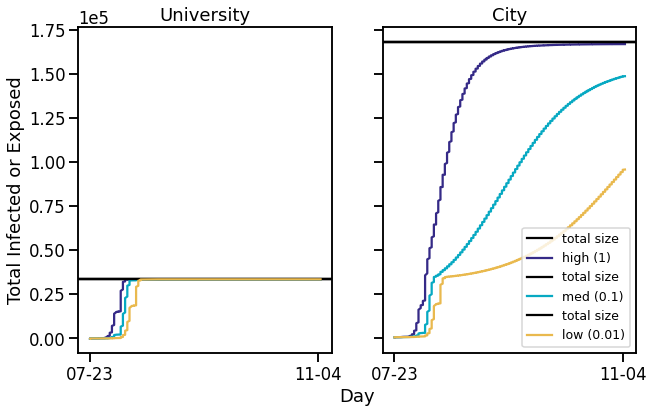

In [23]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(len(toload)):
    ax1.axhline(y=uni_size, c = "black")
    ax2.axhline(y=city_size, label = "total size", c = "black")
    ax1.plot(runst[xx], uni_size - runsy[xx][0,0],
             label = coupling_labels[xx], color = parula[xx*25], ms = 4 )
    ax2.plot(runst[xx], city_size - np.add(runsy[xx][0,0],runsy[xx][0,1]), 
             label = coupling_labels[xx], color = parula[xx*25], ms = 4 )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Total Infected or Exposed")
ax1.set_title("University")
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])
ax2.set_title("City")


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.set_ylim(0,5*(10**4))


plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

plt.savefig("figures/06_total_exp.png")
plt.show()

<Figure size 432x288 with 0 Axes>

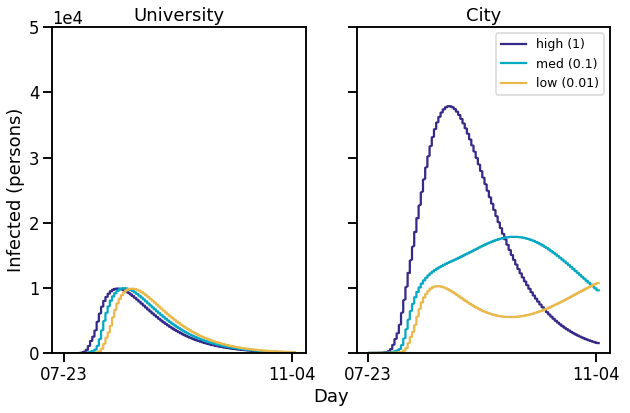

In [24]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(len(toload)):
    ax1.plot(runst[xx], runsy[xx][3,0],
             label = coupling_labels[xx], color = parula[xx*25], ms = 4 )
    ax2.plot(runst[xx], np.add(runsy[xx][3,0],runsy[xx][3,1]), 
             label = coupling_labels[xx], color = parula[xx*25], ms = 4 )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])
ax2.set_title("City")


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.set_ylim(0,5*(10**4))


plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

plt.savefig("figures/06_infected_curve.png")
plt.show()

In [25]:
toloadQ = ["multi_Q=0.5_csize=15_per=3_msize500_sch=none_coupling=1.0.npy",
          "multi_Q=0.5_csize=15_per=3_msize500_sch=none_coupling=0.1.npy", 
         "multi_Q=0.5_csize=15_per=3_msize500_sch=none_coupling=0.01.npy"]
loadedQ = [np.load("multi_runs/" + str(entry), allow_pickle = True) 
           for entry in toloadQ]


datatsQ = [[[rightdate(t) for t in entry.t] for entry in dat] for dat in loadedQ]
dataysQ = [[entry.y for entry in dat] for dat in loadedQ]

runstQ = [np.concatenate(entry) for entry in datatsQ]
runsyQ = [np.reshape(np.concatenate(dataysQ[xx],axis = -1),(6,3,np.size(runstQ[xx])))
         for xx in range(len(toloadQ))]

In [26]:
coupling_labels_new = ["H", "M", "L"]

737629.0

<Figure size 432x288 with 0 Axes>

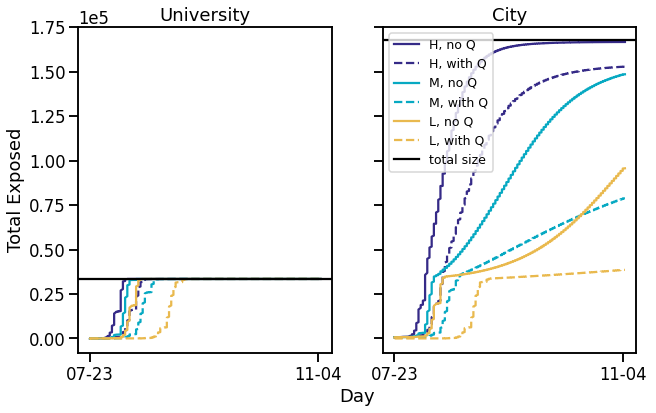

In [42]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(len(toload)):
    ax1.plot(runst[xx], uni_size - runsy[xx][0,0],
             label = coupling_labels_new[xx] + ", no Q", color = parula[xx*25] )
    ax1.plot(runstQ[xx], uni_size - runsyQ[xx][0,0],
             label = coupling_labels_new[xx] + ", with Q",
             color = parula[xx*25],
             linestyle = "dashed", marker = " " )
    ax2.plot(runst[xx], city_size - np.add(runsy[xx][0,0],runsy[xx][0,1]), 
             label = coupling_labels_new[xx] + ", no Q",
             color = parula[xx*25])
    ax2.plot(runstQ[xx], city_size - np.add(runsyQ[xx][0,0],runsyQ[xx][0,1]), 
             label = coupling_labels_new[xx]+  ", with Q", color = parula[xx*25],
            linestyle = "dashed", marker = " " )
    

ax1.axhline(y=uni_size, c = "black")
ax2.axhline(y=city_size, label = "total size", c = "black")
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Total Exposed")
ax1.set_title("University")
ax2.set_title("City")
#ax2.set_ylim(0,5*(10**4))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

plt.savefig("figures/07_totalExposed.png")
plt.show()

<Figure size 432x288 with 0 Axes>

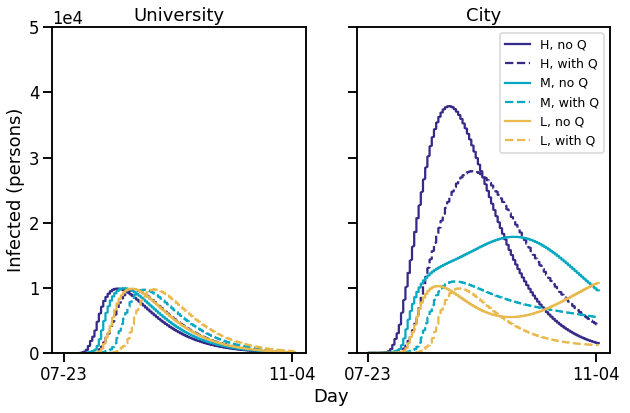

In [14]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(len(toload)):
    ax1.plot(runst[xx], runsy[xx][3,0],
             label = coupling_labels_new[xx] + ", no Q", color = parula[xx*25] )
    ax1.plot(runstQ[xx], 2*runsyQ[xx][3,0],
             label = coupling_labels_new[xx] + ", with Q",
             color = parula[xx*25],
             linestyle = "dashed", marker = " " )
    ax2.plot(runst[xx], np.add(runsy[xx][3,0],runsy[xx][3,1]), 
             label = coupling_labels_new[xx] + ", no Q",
             color = parula[xx*25])
    ax2.plot(runstQ[xx], 2*np.add(runsyQ[xx][3,0],runsyQ[xx][3,1]), 
             label = coupling_labels_new[xx]+  ", with Q", color = parula[xx*25],
            linestyle = "dashed", marker = " " )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,5*(10**4))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

plt.savefig("figures/07_new.png")
plt.show()

In [28]:
Q_daystag = ["multi_Q=0.5_csize=15_per=3_msize500_sch=day_stagger_coupling=1.0.npy",
          "multi_Q=0.5_csize=15_per=3_msize500_sch=day_stagger_coupling=0.1.npy", 
         "multi_Q=0.5_csize=15_per=3_msize500_sch=day_stagger_coupling=0.01.npy"]

Q_weekstag = ["multi_Q=0.5_csize=15_per=3_msize500_sch=week_stagger_coupling=1.0.npy",
          "multi_Q=0.5_csize=15_per=3_msize500_sch=week_stagger_coupling=0.1.npy", 
         "multi_Q=0.5_csize=15_per=3_msize500_sch=week_stagger_coupling=0.01.npy"]

noQ_daystag = ["multi_Q=0.0_csize=15_per=3_msize500_sch=day_stagger_coupling=1.0.npy",
          "multi_Q=0.0_csize=15_per=3_msize500_sch=day_stagger_coupling=0.1.npy", 
         "multi_Q=0.0_csize=15_per=3_msize500_sch=day_stagger_coupling=0.01.npy"]

noQ_weekstag = ["multi_Q=0.0_csize=15_per=3_msize500_sch=week_stagger_coupling=1.0.npy",
          "multi_Q=0.0_csize=15_per=3_msize500_sch=week_stagger_coupling=0.1.npy", 
         "multi_Q=0.0_csize=15_per=3_msize500_sch=week_stagger_coupling=0.01.npy"]

In [29]:
loadedQ_daystag = [np.load("multi_runs/" + str(entry), allow_pickle = True) 
           for entry in Q_daystag]
loadedQ_weekstag = [np.load("multi_runs/" + str(entry), allow_pickle = True) 
           for entry in Q_weekstag]

loadednoQ_daystag = [np.load("multi_runs/" + str(entry), allow_pickle = True) 
           for entry in noQ_daystag]
loadednoQ_weekstag = [np.load("multi_runs/" + str(entry), allow_pickle = True) 
           for entry in noQ_weekstag]

In [30]:
datatsQ_daystag = [[[rightdate(t) for t in entry.t] for entry in dat] for dat in loadedQ_daystag]
dataysQ_daystag = [[entry.y for entry in dat] for dat in loadedQ_daystag]

runstQ_daystag = [np.concatenate(entry) for entry in datatsQ_daystag]
runsyQ_daystag = [np.reshape(np.concatenate(dataysQ_daystag[xx],axis = -1),(6,3,np.size(runstQ_daystag[xx])))
         for xx in range(len(toloadQ))]

In [31]:
datatsQ_weekstag = [[[rightdate(t) for t in entry.t] for entry in dat] for dat in loadedQ_weekstag]
dataysQ_weekstag = [[entry.y for entry in dat] for dat in loadedQ_weekstag]

runstQ_weekstag = [np.concatenate(entry) for entry in datatsQ_weekstag]
runsyQ_weekstag = [np.reshape(np.concatenate(dataysQ_weekstag[xx],axis = -1),(6,3,np.size(runstQ_weekstag[xx])))
         for xx in range(len(toloadQ))]

In [32]:
datatsnoQ_weekstag = [[[rightdate(t) for t in entry.t] for entry in dat] for dat in loadednoQ_weekstag]
dataysnoQ_weekstag = [[entry.y for entry in dat] for dat in loadednoQ_weekstag]

runstnoQ_weekstag = [np.concatenate(entry) for entry in datatsnoQ_weekstag]
runsynoQ_weekstag = [np.reshape(np.concatenate(dataysnoQ_weekstag[xx],axis = -1),(6,3,np.size(runstnoQ_weekstag[xx])))
         for xx in range(len(toloadQ))]

In [33]:
datatsnoQ_daystag = [[[rightdate(t) for t in entry.t] for entry in dat] for dat in loadednoQ_daystag]
dataysnoQ_daystag = [[entry.y for entry in dat] for dat in loadednoQ_daystag]

runstnoQ_daystag = [np.concatenate(entry) for entry in datatsnoQ_daystag]
runsynoQ_daystag = [np.reshape(np.concatenate(dataysnoQ_daystag[xx],axis = -1),(6,3,np.size(runstnoQ_daystag[xx])))
         for xx in range(len(toloadQ))]

<Figure size 432x288 with 0 Axes>

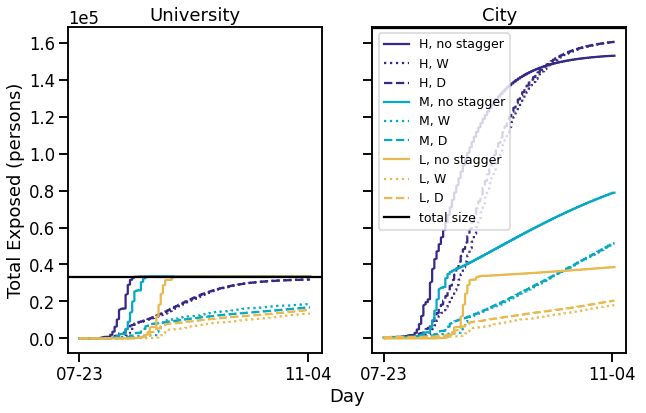

In [47]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstQ_weekstag[xx], uni_size - 2*runsyQ_weekstag[xx][0,0],
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runstQ[xx], uni_size - runsyQ[xx][0,0],
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    ax1.plot(runstQ_daystag[xx], uni_size - 2*runsyQ_daystag[xx][0,0],
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runstQ[xx], city_size - np.add(runsyQ[xx][0,0],runsyQ[xx][0,1]), 
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    
    ax2.plot(runstQ_weekstag[xx], city_size - np.add(2*runsyQ_weekstag[xx][0,0],
                                         runsyQ_weekstag[xx][0,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstQ_daystag[xx], city_size - np.add(2*runsyQ_daystag[xx][0,0],
                                         runsyQ_daystag[xx][0,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.axhline(y=uni_size, c = "black")
ax2.axhline(y=city_size, label = "total size", c = "black")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

ax1.set_ylabel("Total Exposed (persons)")
ax1.set_title("University")
ax2.set_title("City")
#ax2.set_ylim(0,2*(10**4))

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)

plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.savefig("figures/08_new_total_exposed.png")
plt.show()

<Figure size 432x288 with 0 Axes>

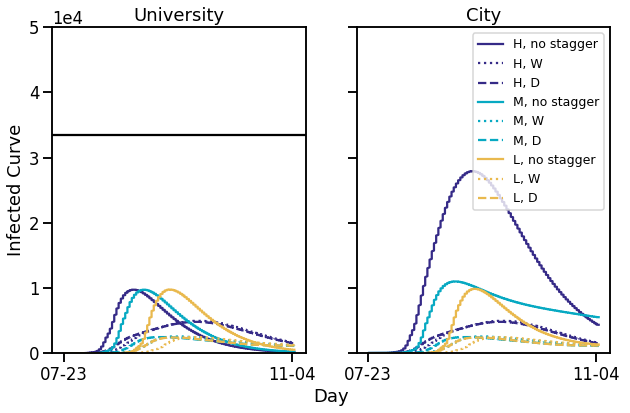

In [61]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstQ_weekstag[xx], 2*np.add(runsyQ_weekstag[xx][2,0],runsyQ_weekstag[xx][2,-1]),
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runstQ[xx], 2*runsyQ[xx][2,0],
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    ax1.plot(runstQ_daystag[xx], 2*np.add(runsyQ_daystag[xx][2,0], runsyQ_daystag[xx][2,-1]),
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runstQ[xx], 2*np.add(runsyQ[xx][2,0],runsyQ[xx][2,1]), 
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    
    ax2.plot(runstQ_weekstag[xx], 2*np.add(runsyQ_weekstag[xx][2,0],runsyQ_weekstag[xx][2,-1],
                                         runsyQ_weekstag[xx][2,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstQ_daystag[xx], 2*np.add(runsyQ_daystag[xx][2,0],runsyQ_daystag[xx][2,-1],
                                         runsyQ_daystag[xx][2,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.axhline(y=uni_size, c = "black")
#ax2.axhline(y=city_size, label = "total size", c = "black")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

ax1.set_ylabel("Infected Curve")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,5*(10**4))

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)

plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.savefig("figures/08_new_infected_curve.png")
plt.show()

<Figure size 432x288 with 0 Axes>

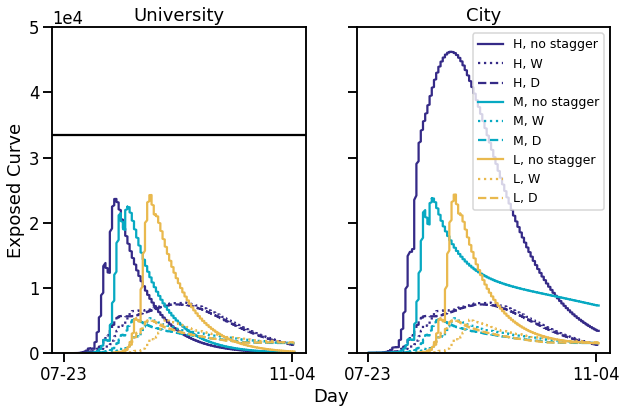

In [60]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstQ_weekstag[xx], np.add(runsyQ_weekstag[xx][1,0],runsyQ_weekstag[xx][1,-1]),
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runstQ[xx], runsyQ[xx][1,0],
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    ax1.plot(runstQ_daystag[xx], np.add(runsyQ_daystag[xx][1,0], runsyQ_daystag[xx][1,-1]),
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runstQ[xx], np.add(runsyQ[xx][1,0],runsyQ[xx][1,1]), 
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    
    ax2.plot(runstQ_weekstag[xx], np.add(runsyQ_weekstag[xx][1,0],runsyQ_weekstag[xx][1,-1],
                                         runsyQ_weekstag[xx][1,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstQ_daystag[xx], np.add(runsyQ_daystag[xx][1,0],runsyQ_daystag[xx][1,-1],
                                         runsyQ_daystag[xx][1,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.axhline(y=uni_size, c = "black")
#ax2.axhline(y=city_size, label = "total size", c = "black")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

ax1.set_ylabel("Exposed Curve")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,5*(10**4))

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)

plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.savefig("figures/08_new_exposed_curve.png")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1209,) and (1210,)

<Figure size 432x288 with 0 Axes>

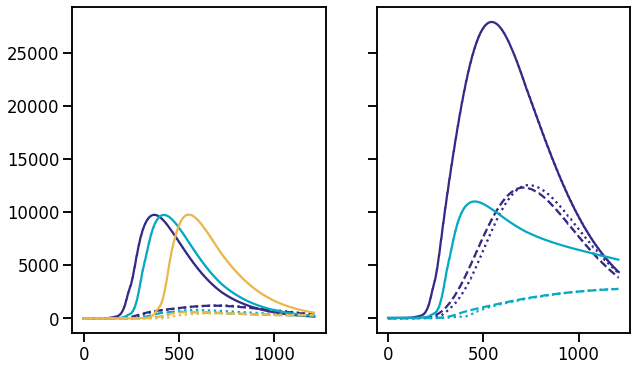

In [65]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(range(len(runsyQ_weekstag[xx][3,0])), runsyQ_weekstag[xx][3,0],
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(range(len(runsyQ[xx][3,0])), 2*runsyQ[xx][3,0],
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    ax1.plot(range(len(runsyQ_daystag[xx][3,0])), runsyQ_daystag[xx][3,0],
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(range(len(runsyQ_weekstag[xx][3,0])), 2*np.add(runsyQ[xx][3,0],runsyQ[xx][3,1]), 
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    
    ax2.plot(range(len(runsyQ[xx][3,0])), np.add(runsyQ_weekstag[xx][3,0],
                                         runsyQ_weekstag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(range(len(runsyQ_daystag[xx][3,0])), np.add(runsyQ_daystag[xx][3,0],
                                         runsyQ_daystag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,2*(10**4))

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.savefig("figures/08_new_lessaxis.png")
plt.show()

<Figure size 432x288 with 0 Axes>

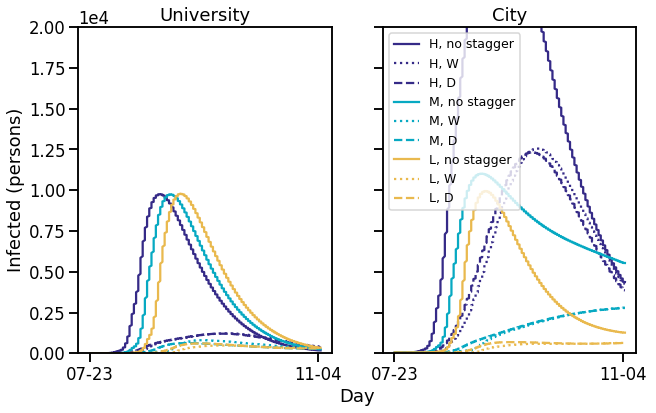

In [39]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstQ_weekstag[xx], runsyQ_weekstag[xx][3,0],
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runstQ[xx], 2*runsyQ[xx][3,0],
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    ax1.plot(runstQ_daystag[xx], runsyQ_daystag[xx][3,0],
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runstQ[xx], 2*np.add(runsyQ[xx][3,0],runsyQ[xx][3,1]), 
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    
    ax2.plot(runstQ_weekstag[xx], np.add(runsyQ_weekstag[xx][3,0],
                                         runsyQ_weekstag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstQ_daystag[xx], np.add(runsyQ_daystag[xx][3,0],
                                         runsyQ_daystag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,2*(10**4))

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.savefig("figures/08_new_lessaxis.png")
plt.show()

<Figure size 432x288 with 0 Axes>

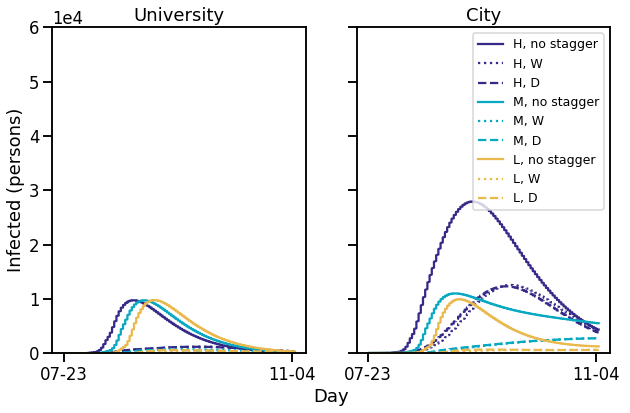

In [40]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstQ_weekstag[xx], runsyQ_weekstag[xx][3,0],
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runstQ[xx], 2*runsyQ[xx][3,0],
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    ax1.plot(runstQ_daystag[xx], runsyQ_daystag[xx][3,0],
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runstQ[xx], 2*np.add(runsyQ[xx][3,0],runsyQ[xx][3,1]), 
             label = coupling_labels_new[xx] + ", no stagger",
             color = parula[xx*25])
    
    ax2.plot(runstQ_weekstag[xx], np.add(runsyQ_weekstag[xx][3,0],
                                         runsyQ_weekstag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstQ_daystag[xx], np.add(runsyQ_daystag[xx][3,0],
                                         runsyQ_daystag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,6*(10**4))

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.savefig("figures/09_new_withQ.png")
plt.show()

<Figure size 432x288 with 0 Axes>

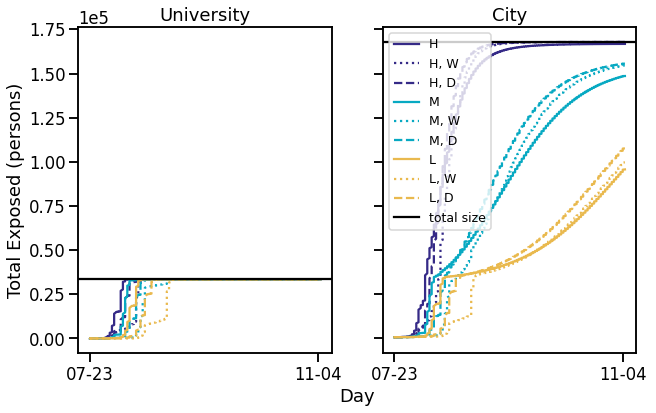

In [52]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstnoQ_weekstag[xx], uni_size - 2*runsynoQ_weekstag[xx][0,0],
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runst[xx], uni_size - runsy[xx][0,0],
             label = coupling_labels_new[xx],
             color = parula[xx*25])
    ax1.plot(runstnoQ_daystag[xx], uni_size - 2*runsynoQ_daystag[xx][0,0],
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runst[xx], city_size - np.add(runsy[xx][0,0],runsy[xx][0,1]), 
             label = coupling_labels_new[xx] ,
             color = parula[xx*25])
    
    ax2.plot(runstnoQ_weekstag[xx], city_size - np.add(2*runsynoQ_weekstag[xx][0,0],
                                         runsynoQ_weekstag[xx][0,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstnoQ_daystag[xx], city_size - np.add(2*runsynoQ_daystag[xx][0,0],
                                         runsynoQ_daystag[xx][0,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )
ax1.axhline(y=uni_size, c = "black")
ax2.axhline(y=city_size, label = "total size", c = "black")

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Total Exposed (persons)")
ax1.set_title("University")
ax2.set_title("City")
#ax2.set_ylim(0,6*(10**4))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

plt.savefig("figures/09_noQ_new_totalexposed.png")
plt.show()

<Figure size 432x288 with 0 Axes>

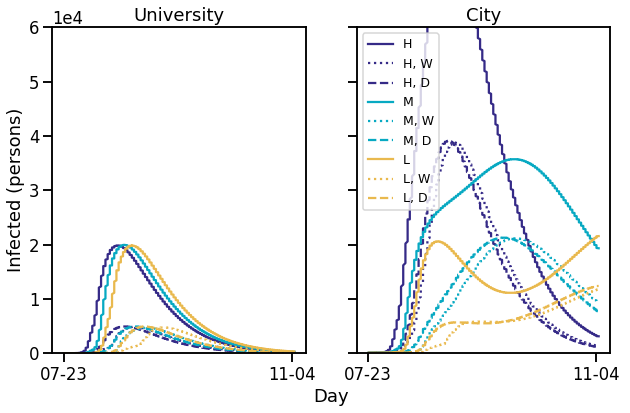

In [41]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)
for xx in range(3):
    ax1.plot(runstnoQ_weekstag[xx], runsynoQ_weekstag[xx][3,0],
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    ax1.plot(runst[xx], 2*runsy[xx][3,0],
             label = coupling_labels_new[xx],
             color = parula[xx*25])
    ax1.plot(runstnoQ_daystag[xx], runsynoQ_daystag[xx][3,0],
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25],
             linestyle = 'dashed' )
    
    
    ax2.plot(runst[xx], 2*np.add(runsy[xx][3,0],runsy[xx][3,1]), 
             label = coupling_labels_new[xx] ,
             color = parula[xx*25])
    
    ax2.plot(runstnoQ_weekstag[xx], np.add(runsynoQ_weekstag[xx][3,0],
                                         runsynoQ_weekstag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", W",
             color = parula[xx*25], linestyle = 'dotted' )
    
    
    ax2.plot(runstnoQ_daystag[xx], np.add(runsynoQ_daystag[xx][3,0],
                                         runsynoQ_daystag[xx][3,1]), 
             label = coupling_labels_new[xx] + ", D",
             color = parula[xx*25], linestyle = 'dashed' )

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,6*(10**4))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xticks(ticks[1:])
ax2.set_xticks(ticks[1:])

plt.legend()

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
ax2.legend(fontsize = 'x-small')

plt.savefig("figures/09_noQ_new.png")
plt.show()

### no school run

In [43]:
noschool = np.load("multi_runs/no_school.npy", allow_pickle = True)

In [44]:
noschool_ts = np.concatenate([[rightdate(t) for t in entry.t]
                              for entry in noschool])
noschool_ys = np.reshape(np.concatenate([entry.y for entry in noschool],
                                        axis = -1), (6,3,np.size(noschool_ts)))

In [45]:
xxlist = ["S", "E", "Q", "I", "R", "D"]

<Figure size 432x288 with 0 Axes>

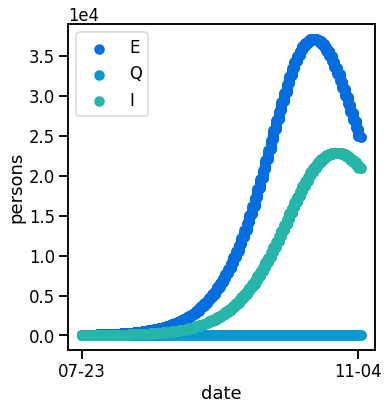

In [57]:
plt.clf()
f, ax = plt.subplots(nrows=1, ncols=1,
                             figsize = (5.5,6), 
                             sharex = True, sharey = True)
for xx in range(1,len(noschool_ys[:-2])):
    
    ax.scatter(noschool_ts, noschool_ys[xx,1],
               label = xxlist[xx], color = parula[xx*10])
#plt.ylim(0,6*(10**4))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xticks(ticks[1:])
plt.xlabel("date")
plt.ylabel("persons")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.set_ylim(0,6*(10**4))
plt.legend()

plt.savefig("figures/no_school.png")



## unpack runs

## plot runs

In [31]:
# first want the snones
'''
FIGURE 7: Infected curve vs. time for overall city 
and w/i university (H,M,L coupling) (curves 
for a couple different class size settings)
'''

# want mtrue, snone
Qfalse = [xx for xx in range(len(names_runs)) if Qs[xx] == 0]
# want mtrue, snone
Qtrue = [xx for xx in range(len(names_runs)) if Qs[xx] != 0]
class_sizes = [5,15,30]
ind_csizes = [[xx for xx in range(len(csizes)) 
               if csizes[xx] == entry] 
              for entry in class_sizes]

mtrue_snone = intersection(mtrue, snone)
ALL = np.array([intersection(intersection(mtrue_snone, Qfalse), csz) 
       for csz in ind_csizes]).flatten()

plt7_y = [runs_y[entry] for entry in ALL]
plt7_t = [runs_t[entry] for entry in ALL]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


TypeError: list indices must be integers or slices, not list

In [ ]:
# 3 is infected
plt7_y[0].shape

In [ ]:
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (12,6), 
                             sharex = True, sharey = True)
for xx in range(len(ALL)):
    ax1.plot(plt7_t[xx], plt7_y[xx][3,0], 
                label = "class size is: " + str(class_sizes[xx]),
                color = parula[xx*25], lw = 3)
    ax1.legend()
    
    ax2.plot(plt7_t[xx], np.add(plt7_y[xx][3,1],plt7_y[xx][3,0]), 
                label = "class size is: " + str(class_sizes[xx]),
                color = parula[xx*25], lw = 3)
    ax2.legend()
    
# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Day")
    
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,6*(10**4))

plt.savefig("figures/fig7_nostagger_noQ.svg")

plt.show()

## figure 8 (as labeled on slides)
want same settings as previous, instead have class size == 15 and change quarantining

this is plt7_y[1]

In [ ]:
mtrue_snone = intersection(mtrue, snone)
ALL2 = np.array([intersection(intersection(mtrue_snone, Qtrue), csz) 
       for csz in ind_csizes]).flatten()

plt8_y = [runs_y[entry] for entry in ALL2]
plt8_t = [runs_t[entry] for entry in ALL2]

In [ ]:
# now want curves for Q and no quaratining, class size is 15

plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (12,6), 
                             sharex = True)
ax1.plot(plt7_t[1], plt7_y[1][3,0], 
            label = "No Quarantining",
            color = parula[0], lw = 3)
ax1.plot(plt8_t[1], plt8_y[1][2,0], 
            label = "Infected, Quarantined \n 1/2 of Total Infected",
            color = parula[25], lw = 3,
         linestyle='dashed')
ax1.plot(plt8_t[1], 2*plt8_y[1][2,0], 
            label = "Total Infected, Quarantining On",
            color = parula[25], lw = 3)

ax1.plot(plt8_t[1], plt8_y[1][3,0], 
            color = parula[25], lw = 3, linestyle='dashed')
    
ax2.plot(plt7_t[1], plt7_y[1][3,1], 
            label = "No Quarantining",
            color = parula[0], lw = 3)

ax2.plot(plt8_t[1], np.add(plt8_y[1][2,1], plt8_y[1][2,0]), 
            label = "Infected, Quarantined\n 1/2 of Total Infected",
            color = parula[25], lw = 3,
         linestyle='dashed')

ax2.plot(plt8_t[1], 2*np.add(plt8_y[1][2,1], plt8_y[1][2,0]), 
            label = "Total Infected, Quarantining On",
            color = parula[25], lw = 3)



# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
    
#ax1.legend()
ax2.legend(fontsize = 'x-small')

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University, Class Size = 15")
ax1.set_title("University")
ax2.set_title("City")

plt.savefig("figures/fig8_nostagger_compQ_csz=15.png")

plt.show()

In [ ]:
dates = matplotlib.dates.date2num(list_of_datetimes)

In [ ]:
# now want curves for Q and no quaratining, class size is 15

plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (12,6), 
                             sharex = True, sharey = True)
ax1.plot(plt7_t[1], plt7_y[1][3,0], 
            label = "No Quarantining",
            color = parula[0], lw = 3)
ax1.plot(plt8_t[1], 2*plt8_y[1][2,0], 
            label = "Infected, Quarantining On",
            color = parula[25], lw = 3)

    
ax2.plot(plt7_t[1], plt7_y[1][3,1], 
            label = "No Quarantining",
            color = parula[0], lw = 3)


ax2.plot(plt8_t[1], 2*np.add(plt8_y[1][2,1], plt8_y[1][2,0]), 
            label = "Infected, Quarantining On",
            color = parula[25], lw = 3)



# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
    
#ax1.legend()
ax2.legend(fontsize = 'x-small')
ax2.set_ylim(0,6*(10**4))

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University, Class Size = 15")
ax1.set_title("University")
ax2.set_title("City")

plt.savefig("figures/fig8_nostagger_compQ_csz=15.svg")

plt.show()

In [ ]:
# now want curves for Q and no quaratining, class size is 15
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (12,6), 
                             sharex = True)
ax1.plot(plt7_t[-1], plt7_y[-1][3,0], 
            label = "No Quarantining",
            color = parula[0], lw = 3)
ax1.plot(plt8_t[-1], plt8_y[-1][2,0], 
            label = "Infected, Quarantined \n 1/2 of Total Infected",
            color = parula[25], lw = 3,
         linestyle='dashed')
ax1.plot(plt8_t[-1], 2*plt8_y[-1][2,0], 
            label = "Total Infected, Quarantining On",
            color = parula[25], lw = 3)

ax1.plot(plt8_t[-1], plt8_y[-1][3,0], 
            color = parula[25], lw = 3, linestyle='dashed')
    
ax2.plot(plt7_t[-1], plt7_y[-1][3,1], 
            label = "No Quarantining",
            color = parula[0], lw = 3)

ax2.plot(plt8_t[-1], np.add(plt8_y[-1][2,1], plt8_y[-1][2,0]), 
            label = "Infected, Quarantined\n 1/2 of Total Infected",
            color = parula[25], lw = 3,
         linestyle='dashed')

ax2.plot(plt8_t[-1], 2*np.add(plt8_y[-1][2,1], plt8_y[-1][2,0]), 
            label = "Total Infected, Quarantining On",
            color = parula[25], lw = 3)



# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
    
#ax1.legend()
ax2.legend(fontsize = 'x-small')

ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University, Class Size = 30")
ax2.set_title("City")

plt.savefig("figures/fig8_nostagger_compQ_csz=30.png")

plt.show()

## compare staggering

In [ ]:
mtrue_snone = intersection(mtrue, snone)
ALL_none_Q = np.array([intersection(intersection(mtrue_snone, Qtrue), csz) 
       for csz in ind_csizes]).flatten()

ALL_wk_Q = np.array([intersection(intersection(intersection(mtrue,sweek),
                                               Qtrue), csz) 
       for csz in ind_csizes]).flatten()

ALL_day_Q = np.array([intersection(intersection(intersection(mtrue,sday),
                                               Qtrue), csz) 
       for csz in ind_csizes]).flatten()

Qs = [ALL_none_Q, ALL_wk_Q, ALL_day_Q]

mtrue_snone = intersection(mtrue, snone)
ALL_none_noQ = np.array([intersection(intersection(mtrue_snone, Qfalse), csz) 
       for csz in ind_csizes]).flatten()

ALL_wk_noQ = np.array([intersection(intersection(intersection(mtrue,sweek),
                                               Qfalse), csz) 
       for csz in ind_csizes]).flatten()

ALL_day_noQ = np.array([intersection(intersection(intersection(mtrue,sday),
                                               Qfalse), csz) 
       for csz in ind_csizes]).flatten()

noQs = [ALL_none_noQ, ALL_wk_noQ, ALL_day_noQ]

plot9_y_no = [[runs_y[entry] for entry in row] for row in noQs]
plot9_y_Q = [[runs_y[entry] for entry in row] for row in Qs]

plot9_t_no = [[runs_t[entry] for entry in row] for row in noQs]
plot9_t_Q = [[runs_t[entry] for entry in row] for row in Qs]

In [ ]:
stag_types = ["no staggering", "weekly staggering", "daily staggering"]

In [ ]:
# now want curves for Q and no quaratining, class size is 15
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)


for xx in range(3):
    ax1.plot(plot9_t_no[xx][1], np.add(plot9_y_no[xx][1][3,0],plot9_y_no[xx][1][3,-1]),
             label = stag_types[xx],
             color = parula[25*xx])
    ax2.plot(plot9_t_no[xx][1], np.add(plot9_y_no[xx][1][3,1],
                                       plot9_y_no[xx][1][3,0], plot9_y_no[xx][1][3,-1]),
                                       label = stag_types[xx],
             color = parula[25*xx])

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
    
ax2.set_ylim(0,6*(10**4))
ax2.legend(fontsize = 'x-small')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")

plt.savefig("figures/fig8_staggering_comp_noQ_csz=15.svg")

plt.show()

In [ ]:
# now want curves for Q and no quaratining, class size is 15
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (10,6), 
                             sharex = True, sharey = True)


for xx in range(3):
    
    ax1.plot(plot9_t_Q[xx][1], np.add(plot9_y_Q[xx][1][3,0],plot9_y_Q[xx][1][3,-1]),
             label = stag_types[xx]+ ", Total Infected",
             color = parula[25*xx])
    ax2.plot(plot9_t_Q[xx][1], 2*np.add(plot9_y_Q[xx][1][3,1],
                                       plot9_y_Q[xx][1][3,0], plot9_y_Q[xx][1][3,-1]),
                                       label = stag_types[xx]+ ", Total Infected",
             color = parula[25*xx])

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
    

ax2.legend(fontsize = 'x-small')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")
ax2.set_ylim(0,6*(10**4))

plt.savefig("figures/fig8_staggering_compQ_csz=15.svg")

plt.show()

In [ ]:
# now want curves for Q and no quaratining, class size is 15
plt.clf()
sns.set_context("talk")
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize = (12,6), 
                             sharex = True)


for xx in range(3):
    ax1.plot(plot9_t_Q[xx][1], np.add(plot9_y_Q[xx][1][3,0],plot9_y_Q[xx][1][3,-1]),
             label = stag_types[xx] + ", Quaratined",
             color = parula[25*xx], linestyle='dashed')
    ax1.plot(plot9_t_Q[xx][1], 2*np.add(plot9_y_Q[xx][1][3,0],plot9_y_Q[xx][1][3,-1]),
             label = stag_types[xx]+ ", Total Infected",
             color = parula[25*xx])
    ax2.plot(plot9_t_Q[xx][1], np.add(plot9_y_Q[xx][1][3,1],
                                       plot9_y_Q[xx][1][3,0], plot9_y_Q[xx][1][3,-1]),
                                       label = stag_types[xx] + ", Quaratined",
             color = parula[25*xx], linestyle = "dashed")
    ax2.plot(plot9_t_Q[xx][1], 2*np.add(plot9_y_Q[xx][1][3,1],
                                       plot9_y_Q[xx][1][3,0], plot9_y_Q[xx][1][3,-1]),
                                       label = stag_types[xx]+ ", Total Infected",
             color = parula[25*xx])

# add common x title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, 
                bottom=False, left=False, right=False)
plt.xlabel("Day")
    

ax2.legend(fontsize = 'x-small')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1.set_ylabel("Infected (persons)")
ax1.set_title("University")
ax2.set_title("City")

plt.savefig("figures/fig8_staggering_compQ_csz=15.png")

plt.show()

In [ ]:
# data
data = np.load("multi_runs/multi_Q=0.0_csize=15_per=3_msize500_sch=none_coupling=1.0.npy", allow_pickle = True)

In [ ]:
datats = [entry.t for entry in data]
datays = [entry.y for entry in data]

runt = np.concatenate(datats)
runy = np.reshape(np.concatenate(datays, axis = -1), (6,3,np.size(runt)))

In [ ]:
runy.shape

In [ ]:
plt.clf()
plt.plot(runt, runy[3,0], label = "uni")
plt.plot(runt, np.add(runy[3,1],runy[3,0]) , label = "city")
plt.legend()

plt.show()